In [65]:
import os
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

from matplotlib import pyplot as plt

In [45]:
df = pd.read_csv('./data/data_all.csv')
df.drop(df.columns[0], axis=1, inplace=True)
df.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Year,Lower Confidence Interval,Upper Confidence Interval,Whisker.high,Whisker.low
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,2015,NaN,NaN,NaN,NaN
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,2015,NaN,NaN,NaN,NaN
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,2015,NaN,NaN,NaN,NaN
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,2015,NaN,NaN,NaN,NaN
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,2015,NaN,NaN,NaN,NaN


In [46]:
pred = ['Economy (GDP per Capita)', 'Trust (Government Corruption)', 'Freedom']
resp = ['Happiness Score']

In [47]:
keep_cols = pred + resp
df = df[keep_cols]
df = df.dropna()
df.head()

,Economy (GDP per Capita),Trust (Government Corruption),Freedom,Happiness Score
0,1.39651,0.41978,0.66557,7.587
1,1.30232,0.14145,0.62877,7.561
2,1.32548,0.48357,0.64938,7.527
3,1.45900,0.36503,0.66973,7.522
4,1.32629,0.32957,0.63297,7.427


In [48]:
X = df[pred]
y = df[resp]

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [50]:
# Feature Scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [51]:
y_train = y_train.values.ravel()
y_test = y_test.values.ravel()

In [52]:
print(X_train.shape, y_train.shape)

(624, 3) (624,)


In [53]:
print(X_test.shape, y_test.shape)

(157, 3) (157,)


In [77]:
n_estimators = [5, 10, 50, 100, 200, 500, 1000]
mae, mse, rmse, train_scores, test_scores = [], [], [], [], []

for n in n_estimators:
    
    regressor = RandomForestRegressor(n_estimators=n, random_state=0)
    regressor.fit(X_train, y_train)
    
    train_scores.append(regressor.score(X_train, y_train))
    test_scores.append(regressor.score(X_test, y_test))

    test_y_pred = regressor.predict(X_test)
    mae.append(metrics.mean_absolute_error(y_test, test_y_pred))
    mse.append(metrics.mean_squared_error(y_test, test_y_pred))
    rmse.append(np.sqrt(metrics.mean_squared_error(y_test, test_y_pred)))

In [78]:
metrics_df = pd.DataFrame({
    'n_estimators': n_estimators,
    'mean_absolute_error': mae,
    'mean_squared_error': mse,
    'root_mean_squared_error': rmse,
    'train_scores': train_scores,
    'test_scores': test_scores
})

In [79]:
metrics_df.plot(    
    x='n_estimators', 
    y='root_mean_squared_error',
    kind='line',
    title='RMSE vs. N Estimators',    
    xlabel='n_estimators', 
    ylabel='root_mean_squared_error', 
)

plt.show()

ValueError: -o is not a valid plot kind

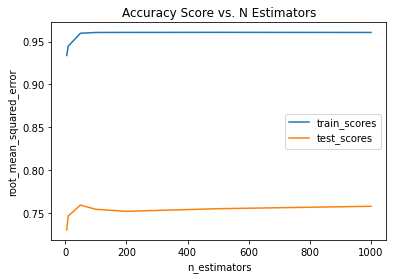

In [82]:
metrics_df.plot(    
    x='n_estimators', 
    y=['train_scores', 'test_scores'],
    kind='line',
    legend=True,
    title='Accuracy Score vs. N Estimators',    
    xlabel='n_estimators', 
    ylabel='root_mean_squared_error'
)

plt.show()

In [77]:
econ_new = [.5]
trust_new = [.5]
freed_new = [.5]
Xnew = pd.DataFrame({'Economy (GDP per Capita)': econ_new, 
                     'Trust (Government Corruption)': trust_new, 
                     'Freedom': freed_new})
Xnew = sc.transform(Xnew)
# make a prediction
ynew = regressor.predict(Xnew)
# show the inputs and predicted outputs
for i in range(len(Xnew)):
    print(f"X = {Xnew[i]}, Predicted = {ynew[i]}")

X = [-0.99618963  3.63776928  0.60458446], Predicted = 4.11502598923449
